# Projet partie 2
Groupe 3

Mathieu Muty - MUTM22090200

Gabrielle Walgraef - WALG13580100

Mamoudou Camara - CAMM12080206

In [1]:
# importation des libraries

import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [30]:
# chargement des fichiers csv
environnement = pd.read_csv('./data_projet/environnement.csv')
genre = pd.read_csv('./data_projet/genre.csv')
meteo = pd.read_csv('./data_projet/meteo.csv')
propulation = pd.read_csv('./data_projet/population.csv')
surface = pd.read_csv('./data_projet/surface.csv')
rapport = pd.read_excel('./data_projet/rapports-accident-2021.xlsx')

### <span style="color: cyan;">Question 1</span>
Existe-t-il une association significative entre la gravité de l'accident et la météo ? Considérez
seulement les catégories de gravité suivantes

- Dommages matériels inférieurs au seuil de rapportage
- Dommages matériels seulement
- Léger

**Répondre à l'aide de test d'hypothèse**

### Réponse et justification :
Pour la réponse à la question 1 nous avons choisi d'utiliser le test d'indépendance du Khi-deux (χ²)  car il est utilisé pour analyser s'il existe une association significative entre deux variables catégorielles. 
Ce que sont les variables "gravité" et "météo".

Hypothèse nulle (H0): les variables sont indépendantes, il n'y a pas de relation entre la gravité et la météo. Connaître la valeur d'une variable n'aide pas à prédire la valeur de l'autre variable

Hypothèse alternative (H1): les variables sont dépendantes, il existe une relation entre la gravité et la météo. Connaître la valeur d'une variable permet de prédire la valeur de l'autre variable

In [20]:
from scipy.stats import chi2_contingency

clean_weather_mask = rapport['CD_COND_METEO'].isna()
data = rapport.drop(rapport[clean_weather_mask].index, axis=0)

#stockage des colonnes dans un dataframe temporaire
tmp = data[["gravite", "CD_COND_METEO"]].copy()

#filtrer et nettoyer les données 
masque_gravite = tmp['gravite'].isin(['Dommages matériels inférieurs au seuil de rapportage', 'Dommages matériels seulement', 'Léger'])
meteo_acc = tmp[masque_gravite][["gravite", "CD_COND_METEO"]].copy()

# Création de la table de contingence entre les variables meteo et gravité
tab_contingence = pd.crosstab(meteo_acc.gravite, meteo_acc.CD_COND_METEO)

# Chi-square
c, p, dof, expected = chi2_contingency(tab_contingence)
print('statistique du khi deux', c)
# Print the p-value
print('La p-value est', p)
# Vérifier la significativité
alpha = 0.05
if p < alpha:
    print("Il existe une association significative entre la gravité de l'accident et la météo.")
else:
    print("Il n'y a pas suffisamment de preuves pour affirmer une association significative.") 

statistique du khi deux 499.72668218929346
La p-value est 1.1909764108213755e-94
Il existe une association significative entre la gravité de l'accident et la météo.


La statistique du Khi-deux (499.73) est élevée, donc il y a une différence significative entre les fréquences observées dans la table de contingence et celles attendues si la gravité de l'accident et la météo étaient indépendantes.

La p-valeur très proche de zéro ( 1.190e-94) montre que les résultats observés sont très peu probables sous l'hypothèse nulle d'indépendance entre la gravité de l'accident et la météo. 

Je peux affirmer qu'il existe une association significative entre la gravité de l'accident et la météo pour les catégories spécifiées.
Je rejette donc l'hypothèse h0 

### <span style="color: cyan;">Question 2</span>
Existe-t-il une corrélation entre la valeur des dommages pour les accidents dont la gravité est
légère et l'âge du conducteur?

**Répondre à l'aide de test d'hypothèse**

### Réponse et justification :

Afin de déterminer quel type de test de corrélation nous allons utiliser (pearson ou spearman) nous devons prendre en compte et ainsi déterminer certain paramètre précis tel que la distribution normale de nos variables

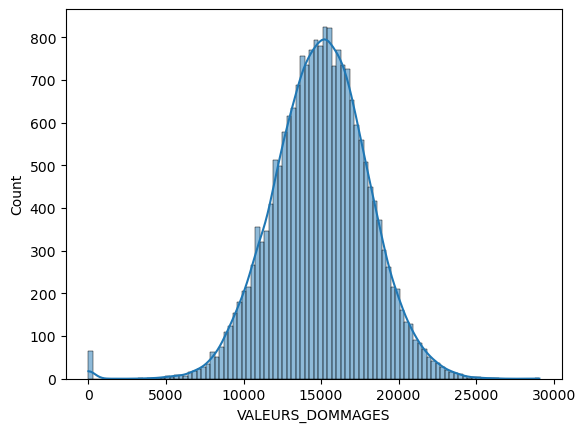

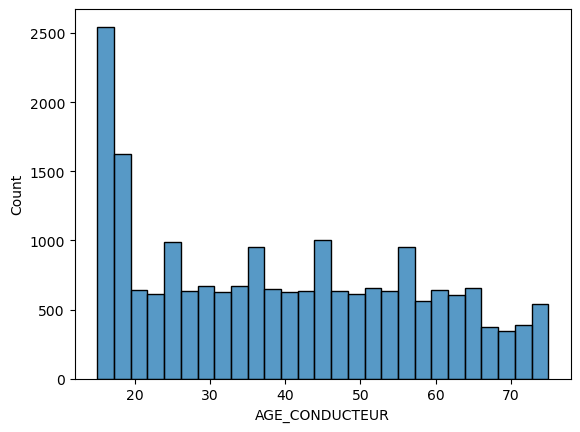

In [17]:
# Récupération de tous les accidents avec la gravité léger dans le dataframe
accdn_leger = rapport[rapport['gravite'] == 'Léger']

# distribution de la valeurs des dommages
sns.histplot(accdn_leger['VALEURS_DOMMAGES'], kde=True)
plt.show()

# distribution des ages des conducteurs
sns.histplot(accdn_leger['AGE_CONDUCTEUR'])
plt.show()

Selon la distribution des deux variables employées, on peut observer que la variable 'VALEURS_DOMMAGES' suit une distribution normale.
Cependant, la variable 'AGE_CONDUCTEUR' ne suit pas la même distribution, il est donc plus judicieux d'utiliser la corrélation de Spearman

In [28]:
# correlation de spearman
rho, p_value = stats.spearmanr(accdn_leger['VALEURS_DOMMAGES'], accdn_leger['AGE_CONDUCTEUR'])
print("pearson correlation = ", rho)
print("p_value", p_value)

# affichage de la matrice de corrélation avec la corrélation de spearman
cont_var=['VALEURS_DOMMAGES', 'AGE_CONDUCTEUR']
accdn_leger.loc[:,cont_var].corr('spearman')

pearson correlation =  -0.00850409840075123
p_value 0.22333881423685936


,VALEURS_DOMMAGES,AGE_CONDUCTEUR
VALEURS_DOMMAGES,1.000000,-0.008504
AGE_CONDUCTEUR,-0.008504,1.000000


Selon les résultats, on peut voir que l'age du conducteur est négativement corrélée a la valeur des dommages (r = -0.008504) : plus l'age du conducteur est élevé, moin la valeur des dommages sera élevé.

### <span style="color: cyan;">Question 3</span>
Existe-t-il une différence significative entre la moyenne de la valeur des dommages en
fonction du sexe du conducteur?

**Répondre à l'aide de test d'hypothèse**

### Réponse et justification :

Pour répondre à cette question  nous allons utiliser le T-test indépendant car ce  test est utilisé pour 
comparer les moyennes de deux groupes et déterminer s'ils sont statistiquement différents l'un de l'autre.

Hypothèses:
Hypothèse Nulle (H0) : Les moyennes des deux groupes sont égales
Hypothèse Alternative (H1): Les moyennes des deux groupes sont différentes.

In [4]:
from scipy import stats

#création de deux groupe différent pour le t-test
groupe_hommes = rapport[rapport['GENRE_CONDUCTEUR'] == 'H']['VALEURS_DOMMAGES']
groupe_femmes = rapport[rapport['GENRE_CONDUCTEUR'] == 'F']['VALEURS_DOMMAGES']

# On valide les variances
print("Variance  pour les hommes",np.std(groupe_hommes))
print("Variance pour les femmes",np.std(groupe_femmes))

# Si ratio des variances (max/min) est inférieure à 2 ou 3, on peut garder le student T-test
print("Ratio des variance",np.std(groupe_hommes) / np.std(groupe_femmes))

#T-test
t_value,p_value=stats.ttest_ind(groupe_hommes, groupe_femmes)

print('p-value pour un test bilatéral %f'%p_value)
# Décision sur l'hypothèse
if p_value < 0.05:
    print("On rejette H0")
else:
    print("On ne rejette pas H0")

Variance  pour les hommes 5209.478954810281
Variance pour les femmes 5196.056735800317
Ratio des variance 1.002583154821518
p-value pour un test bilatéral 0.443927
On ne rejette pas H0


Les variances pour les deux groupes (hommes et femmes) semblent proches l'une de l'autre, ce qui est confirmé par le ratio des variances proche de 1.
La p-valeur résultante du test t de Student est de 0.4439, ce qui est supérieur à un seuil alpha de 0.05.
Comme la p-valeur est supérieure à 0.05, nous ne rejetons pas l'hypothèse nulle (H0) car il n'y a pas suffisamment de preuves statistiques pour conclure à une différence significative entre les moyennes de la valeur des dommages pour les hommes et le femmes

### <span style="color: cyan;">Question 4</span>

Créez une Série nommée time_serie qui présente le nombre d'accident par jour

In [4]:
date_accdn = pd.to_datetime(rapport['DT_ACCDN'], format='%d/%m/%Y')

time_serie = pd.Series(rapport.groupby(date_accdn.dt.date).size())
print(time_serie)

DT_ACCDN
2021-01-01    133
2021-01-02    300
2021-01-03    142
2021-01-04    172
2021-01-05    160
             ... 
2021-12-27    152
2021-12-28    277
2021-12-29    197
2021-12-30    227
2021-12-31    202
Length: 365, dtype: int64


### <span style="color: cyan;">Question 5</span>

Est-ce que time_serie est stationnaire ? Sinon, transformez-la en série stationnaire.

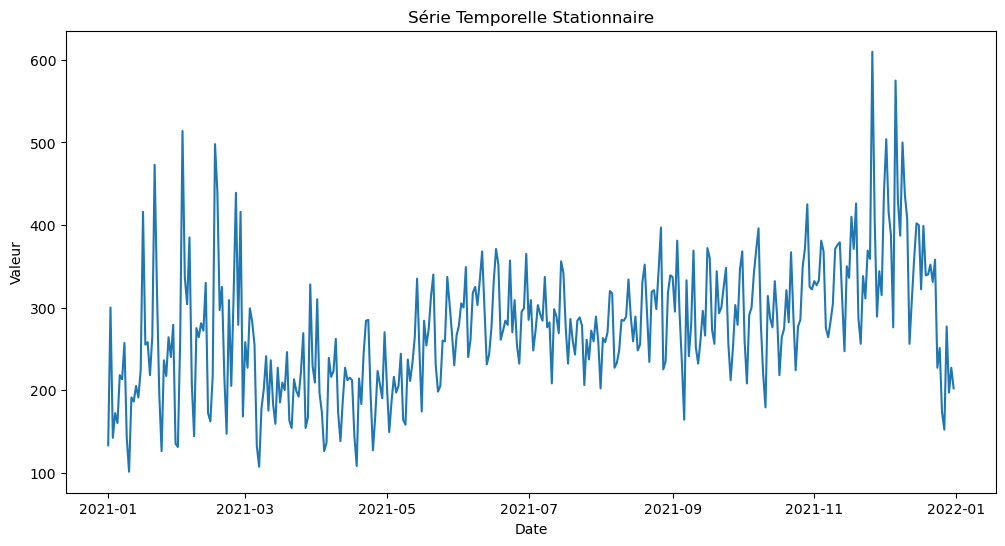

Valeur critique : {'1%': -3.449336554273722, '5%': -2.8699055166063085, '10%': -2.571226758215748}
P-value : 0.17241808734920394


In [5]:
plt.figure(figsize=(12, 6))
plt.plot(time_serie)
plt.title('Série Temporelle Stationnaire')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.show()

# Test de Dickey-Fuller augmenté (ADF)
adft = adfuller(time_serie)

# affichage des 5% de la serie et la p-value
print('Valeur critique :', adft[4])
print('P-value :', adft[1])

D'après la visualisation et la P-value, on peut conclure que cette serie n'est pas stationnaire. La P-value (0.17241808734920394) étant supérieure à 5% de la serie (-2.869905516606308 )

<Axes: xlabel='DT_ACCDN'>

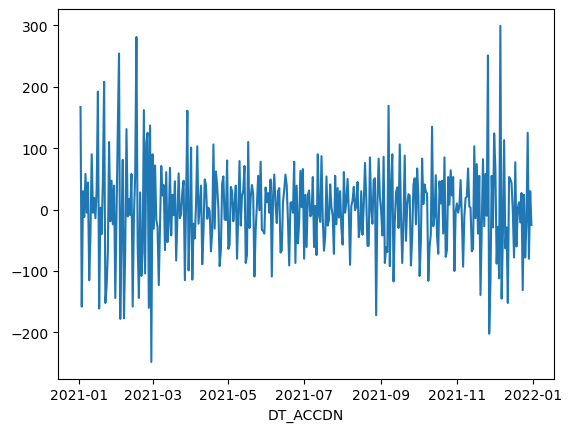

In [6]:
# Transformation en serie stationnaire en utilisant la méthode de différenciation
your_series_diff = time_serie.diff().dropna()

# plot pour afficher la nouvelle serie stationnaire
your_series_diff.plot()

### <span style="color: cyan;">Question 6</span>

Est-ce que time_serie présente une saisonalité? Si oui, quelle est la période de celle-ci
(journalière, hebdomadaire, mensuelle etc)?

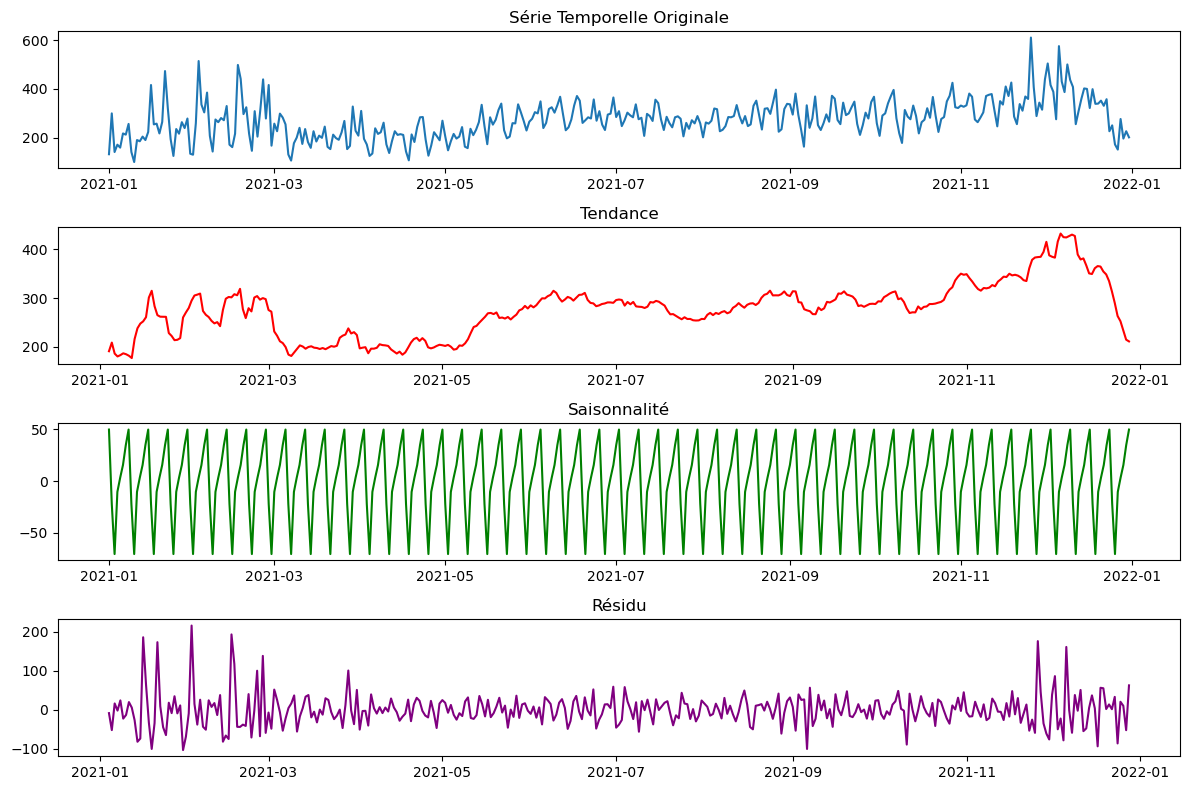

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Création d'un dataframe avec tous les jours de l'année 2021 avec le nombre d'accident pour chacun de ces jours
date_rng = pd.date_range(start='2021-01-01', end='2021-12-31', freq='D')
data = {
    'date': date_rng,
    'value': time_serie,
}

df = pd.DataFrame(data)
df.set_index('date', inplace=True)

# Décomposition de de la série temporelle en utilisant une décomposition additive
result = seasonal_decompose(df['value'], model='additive')

# Afficher les composantes
plt.figure(figsize=(12, 8))

# affichage de la série temporelle d'origine 
plt.subplot(4, 1, 1)
plt.title('Série Temporelle Originale')
plt.plot(df['value'], label='Série Temporelle')

# result.plot()
plt.subplot(4, 1, 2)
plt.title('Tendance')
plt.plot(result.trend, label='Tendance', color='red')

plt.subplot(4, 1, 3)
plt.title('Saisonnalité')
plt.plot(result.seasonal, label='Saisonnalité', color='green')

plt.subplot(4, 1, 4)
plt.title('Résidu')
plt.plot(result.resid, label='Résidu', color='purple')

plt.tight_layout()
plt.show()


Selon le graphique ci-dessus, on remarque que la serie présente une saisonnalité. Il y a environ 10 variations pour une période de 3 mois. on peut en déduire que la période de cette série est hebdomadaire

### <span style="color: cyan;">Question 7</span>

La SAAQ vous contacte afin de lancer une campagne de prévention des accidents de la route.
Elle veut proposer différents messages aux MRCs en fonction des caractérisques des accidents qui s'y
produisent. Bien entendu, la SAAQ ne veut pas faire une campagne par MRC donc elle vous contacte
pour que vous lui proposer une segmentation des MRCs en fonction des caractéristiques des accidents
qui y sont survenus.

Vous devez pour mener à terme ce projet:

o Effectuez les pré-traitement requis à la segmentation (choix des variables, standardisation, gestion des
valeurs extrêmes etc.)

o Proposez un nombre de groupes et les MRCs associées à chacun de ceux-ci.

o Décrire les caractéristiques de chacun des groupes.

Vous pouvez choisir la méthode de segmentation de votre choix. Justifiez chacune des étapes.

### Réponse et justification :

Afin de répondre à la question suivante, nous allons utiliser un apprentissage non supervisé puisque que on ne connait pas les différents groupes au sein des données. Nous allons également utiliser la méthode de segmentation des K-mean

Afin de simplifier la lectures des données nous allons utiliser les régions administratives qui elles mêmes sont des groupes de MRC. Cela nous donnera des tendances pour plusieures MRC en même temps.

In [58]:
# importation des libraries et du fichier excel
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import gower
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

rapport_clean = pd.read_excel('./data_projet/rapports-accident-2021.xlsx')

# Récupération des régions au sein du dataframe

# suppression des lignes qui ont des valeurs manquantes pour les régions administratives.
mask = rapport_clean['REG_ADM'].isna()
rapport_clean = rapport_clean.drop(rapport_clean[mask].index, axis=0)
region = rapport_clean['REG_ADM'].unique()
print(rapport_clean.isna().sum())
region


DT_ACCDN                          0
HR_ACCDN                          0
GENRE_CONDUCTEUR                  0
AGE_CONDUCTEUR                    0
gravite                           0
VALEURS_DOMMAGES                  0
NB_MORTS                          0
NB_BLESSES_GRAVES                 0
NB_BLESSES_LEGERS                 0
NB_VEH_IMPLIQUES_ACCDN            0
NB_DECES_PIETON                   0
NB_BLESSES_PIETON                 0
NB_VICTIMES_PIETON                0
NB_DECES_MOTO                     0
NB_BLESSES_MOTO                   0
NB_VICTIMES_MOTO                  0
NB_DECES_VELO                     0
NB_BLESSES_VELO                   0
NB_VICTIMES_VELO                  0
REG_ADM                           0
MRC                               0
VITESSE_AUTOR                  9302
CD_GENRE_ACCDN                  790
CD_ETAT_SURFC                  1154
CD_ECLRM                       1406
CD_ENVRN_ACCDN                 1231
CD_COND_METEO                  1343
nb_automobile_camion_leger  

array(['Gaspésie/-Îles-de-la-Madeleine (11)', 'Lanaudière (14)',
       'Capitale-Nationale (03)', 'Chaudière-Appalaches (12)',
       'Montréal (06)', 'Bas-Saint-Laurent (01)',
       'Saguenay/-Lac-Saint-Jean (02)', 'Estrie (05)', 'Outaouais (07)',
       'Mauricie (04)', 'Montérégie (16)', 'Laurentides (15)',
       'Abitibi-Témiscamingue (08)', 'Laval (13)', 'Côte-Nord (09)',
       'Centre-du-Québec (17)', 'Nord-du-Québec (10)'], dtype=object)

[[-0.05406931 -0.13806654 -0.12198242 ... -0.06193059 -0.2262214
  -0.18076052]
 [-0.05406931 -0.13806654 -0.12198242 ... -0.06193059 -0.2262214
  -0.18076052]
 [-0.05406931 -0.13806654 -0.12198242 ... -0.06193059 -0.2262214
  -0.18076052]
 ...
 [-0.05406931 -0.13806654 -0.12198242 ... -0.06193059 -0.2262214
  -0.18076052]
 [-0.05406931 -0.13806654 -0.12198242 ... -0.06193059 -0.2262214
  -0.18076052]
 [-0.05406931 -0.13806654 -0.12198242 ... -0.06193059 -0.2262214
  -0.18076052]]


/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

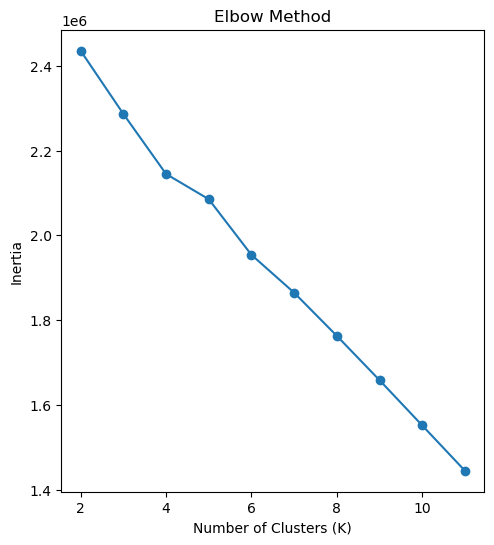

In [60]:
# Récupération de toutes les variables qui seront utilisé pour le K-mean clustering
# TODO faire un graphique par mrc

inertias = []
features = rapport_clean[['gravite', 'NB_MORTS', 'NB_VICTIMES_PIETON', 'NB_VICTIMES_MOTO', 'NB_VICTIMES_VELO','REG_ADM']]

selected_features = pd.get_dummies(features, columns=['gravite', 'REG_ADM'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)
print(scaled_features)

# Try different values of K
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 12), inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Selon le graphique précédent, on peut conclure qu'une valeur de K = 10 est la plus pertinante. 

/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


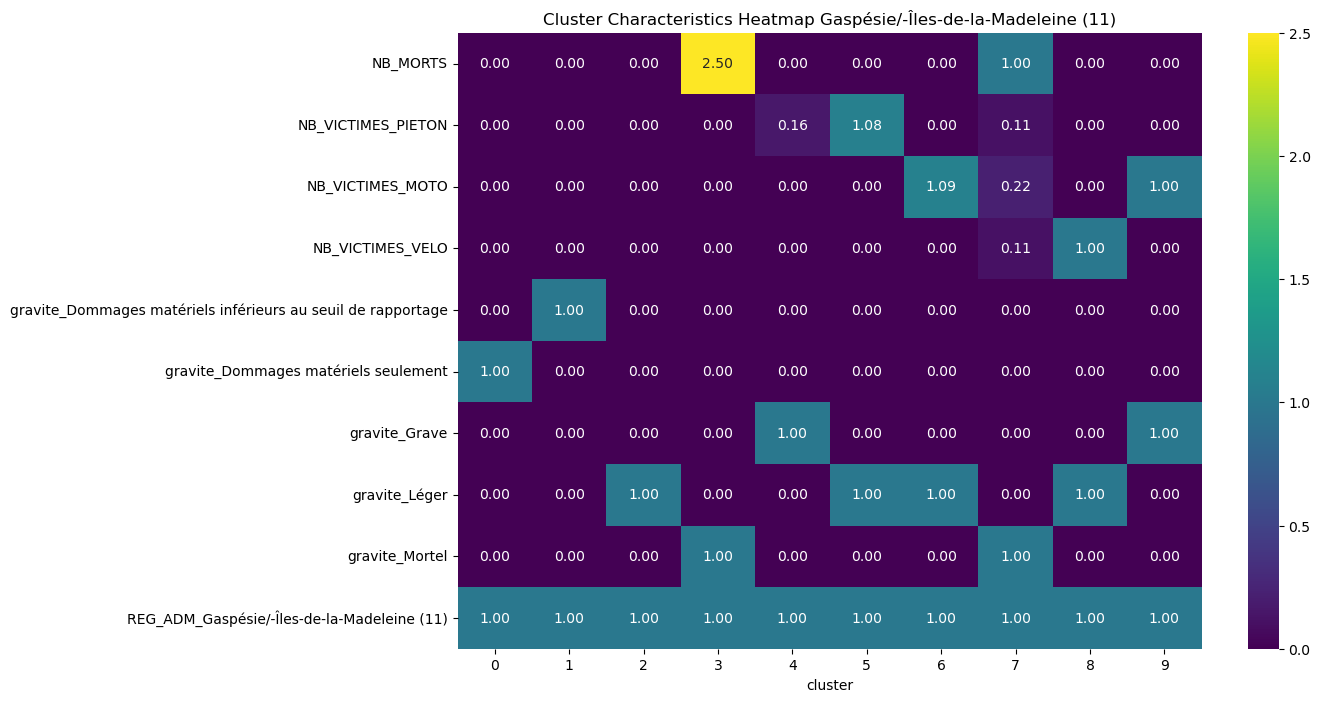

/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


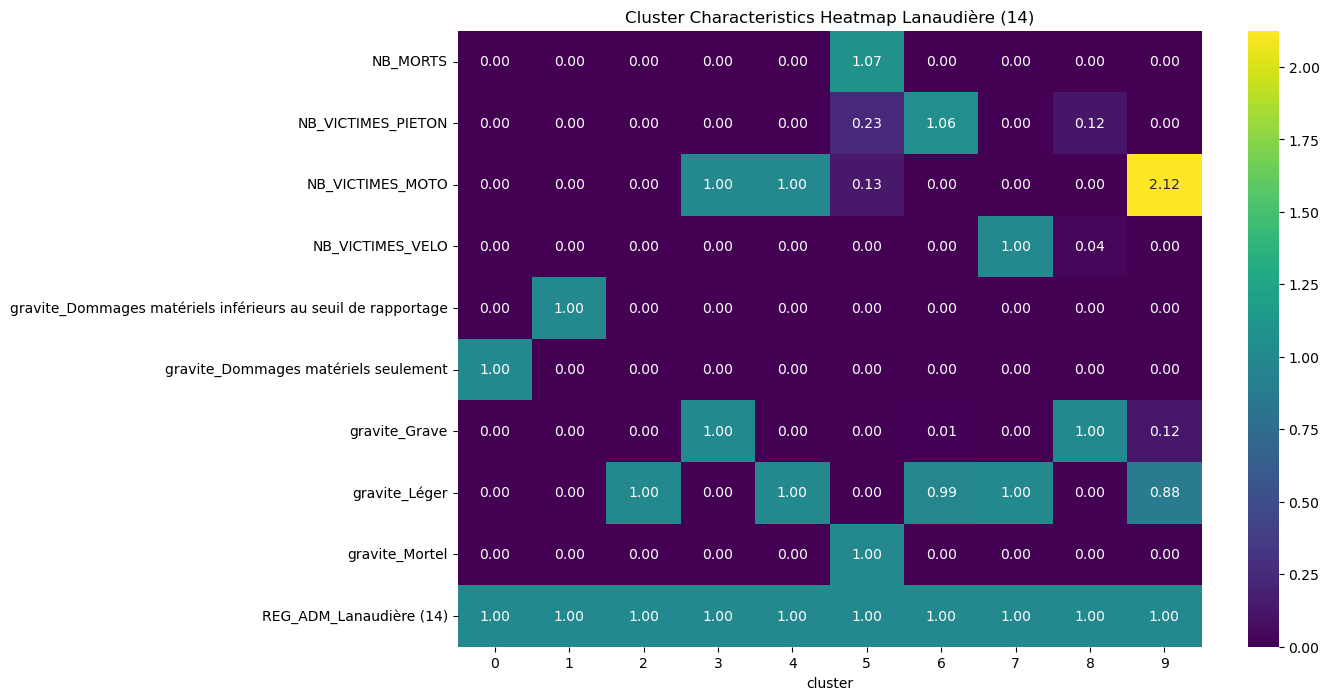

/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


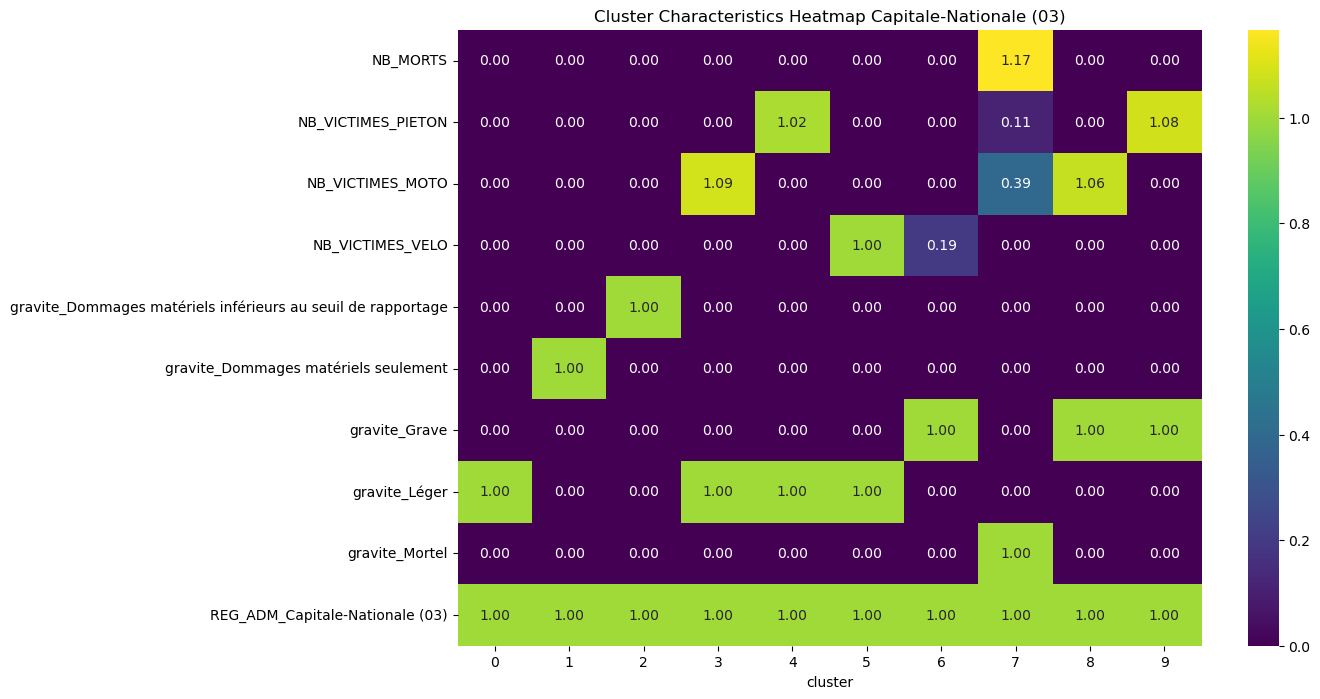

/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


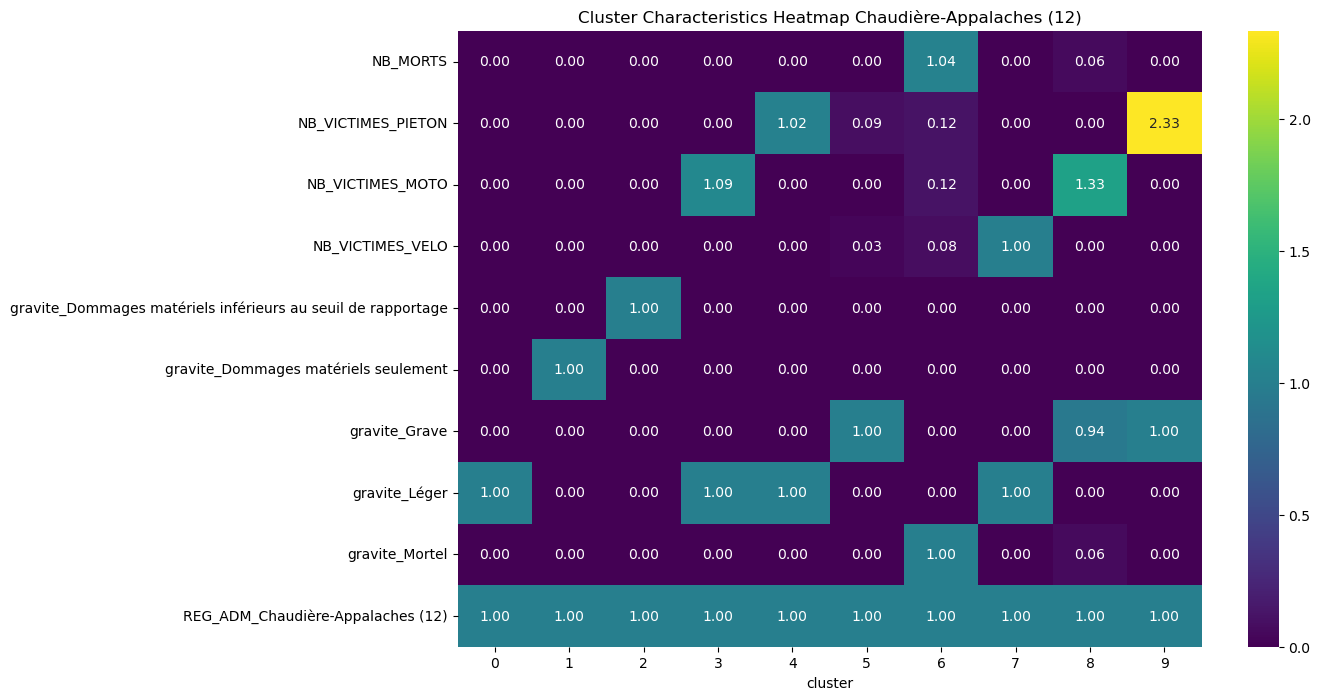

/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


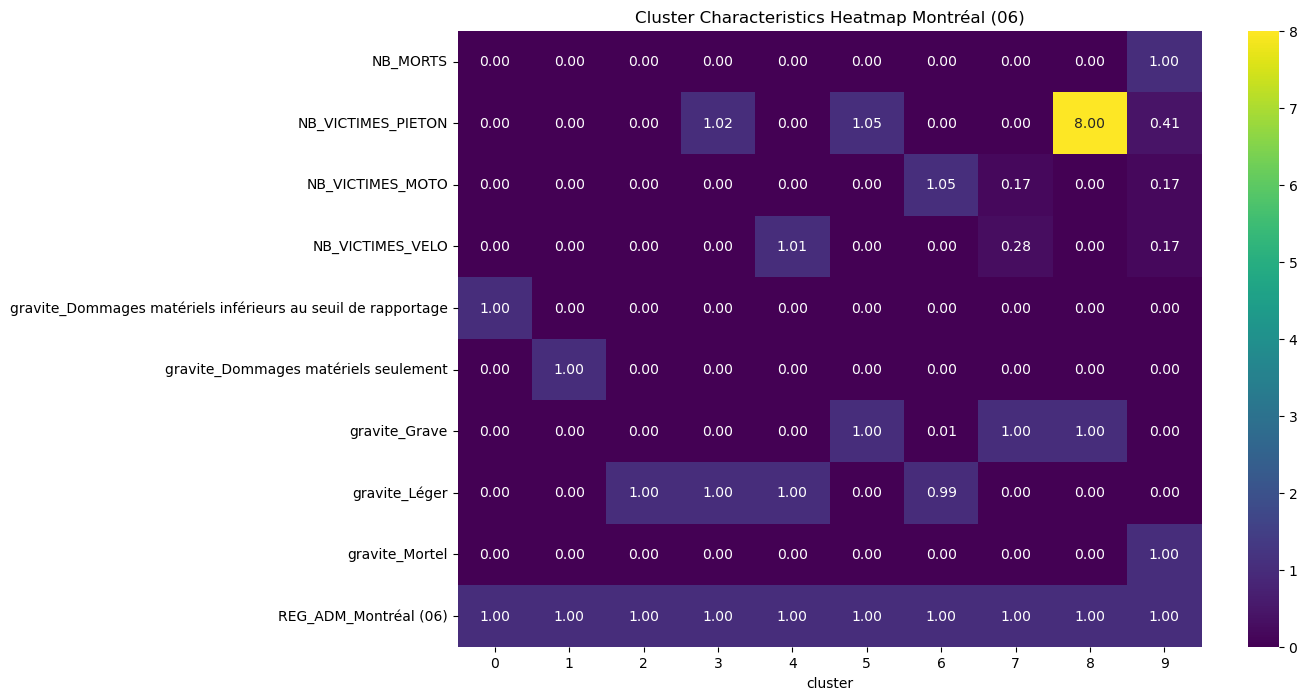

/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


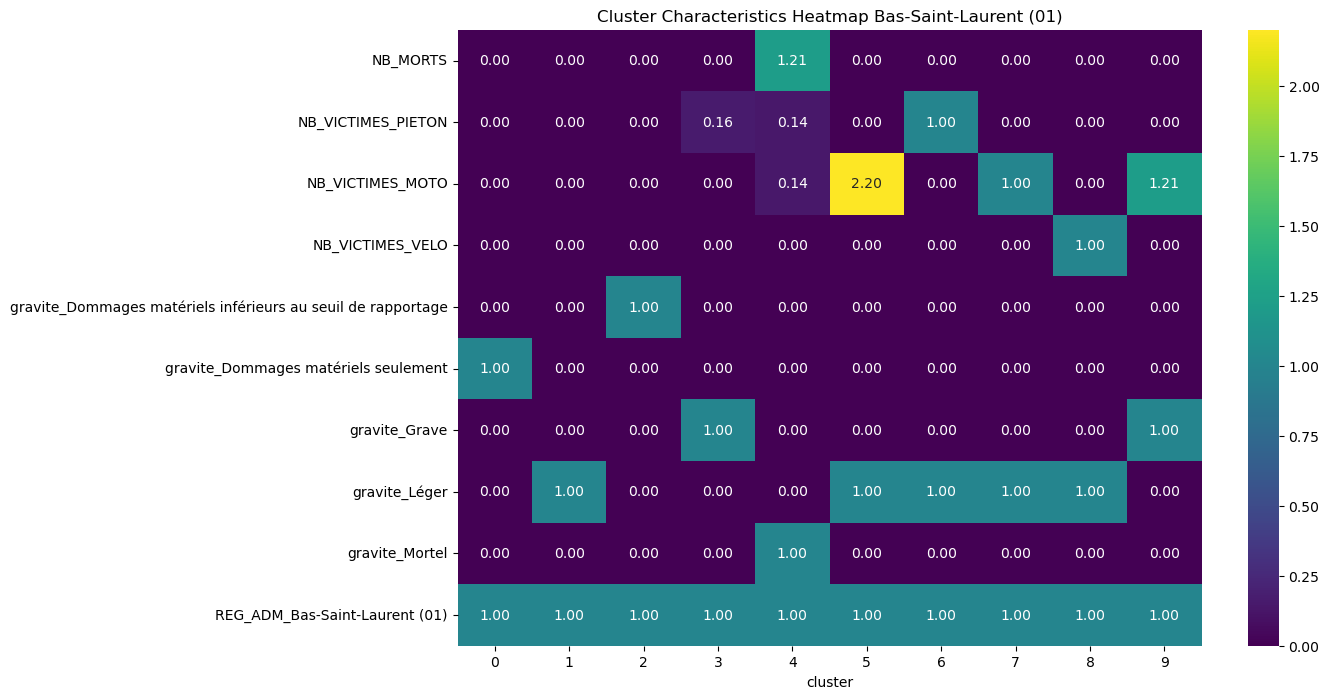

/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


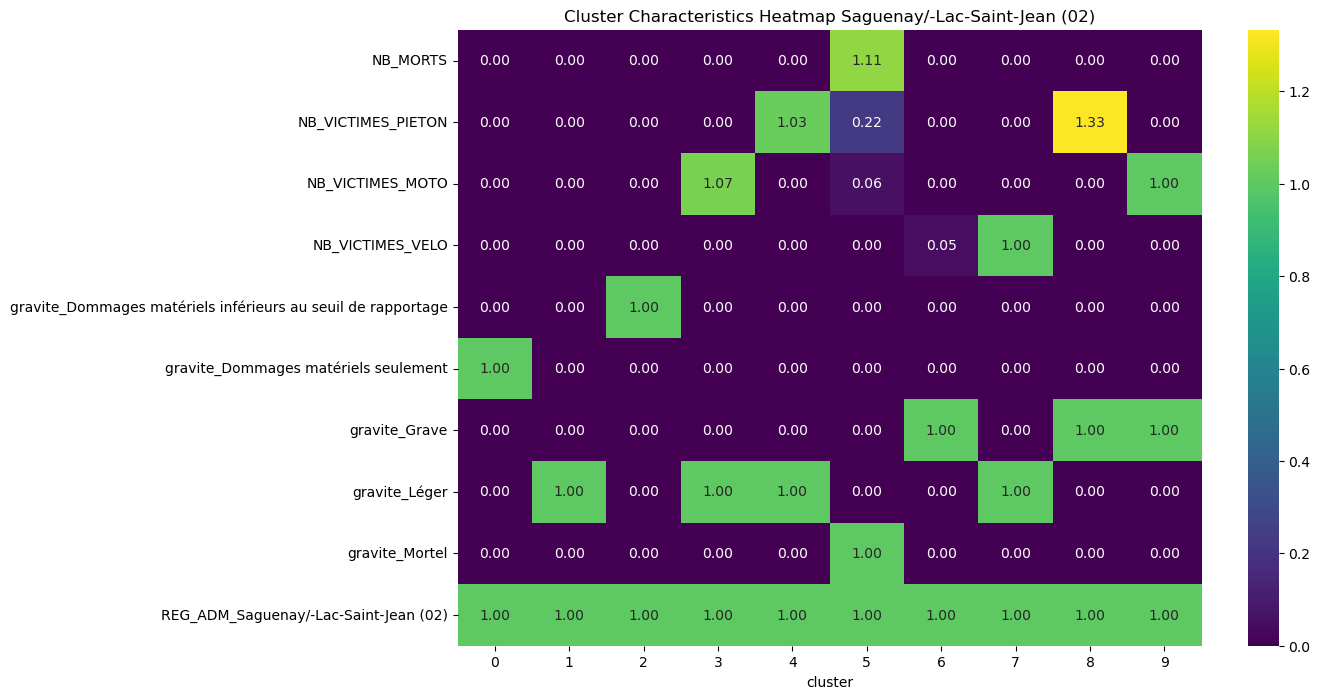

/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


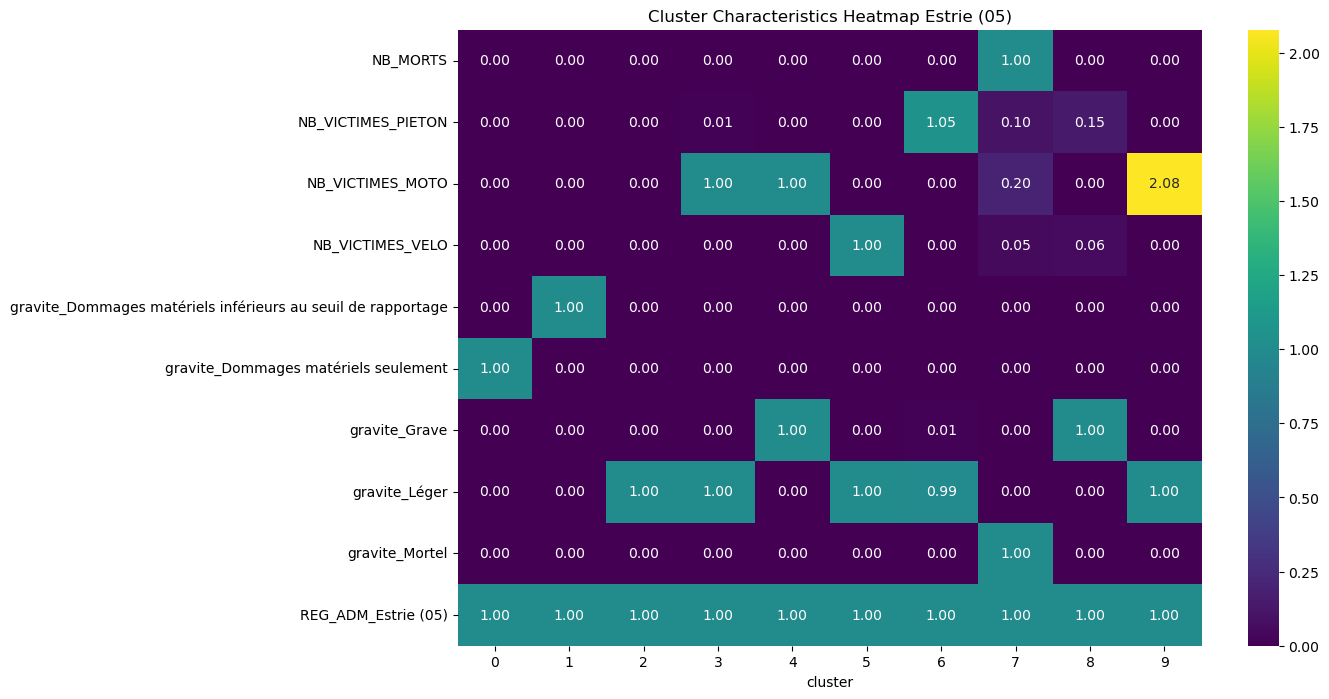

/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


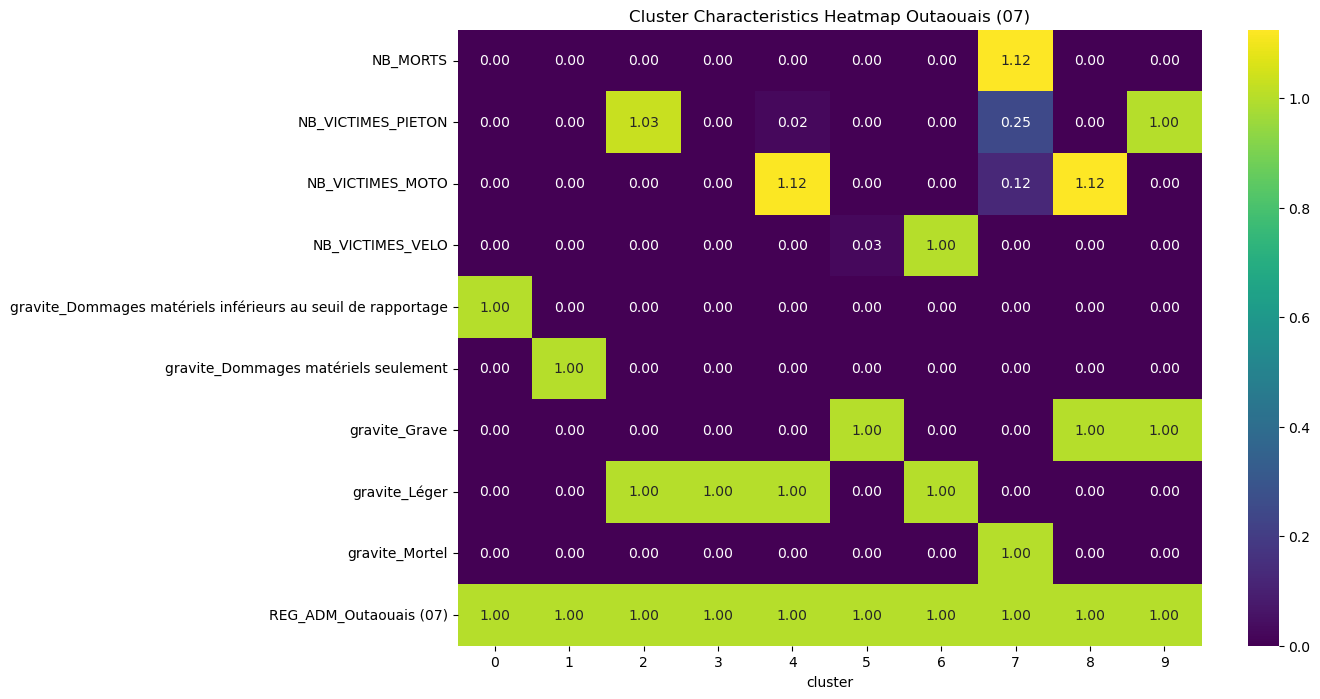

/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


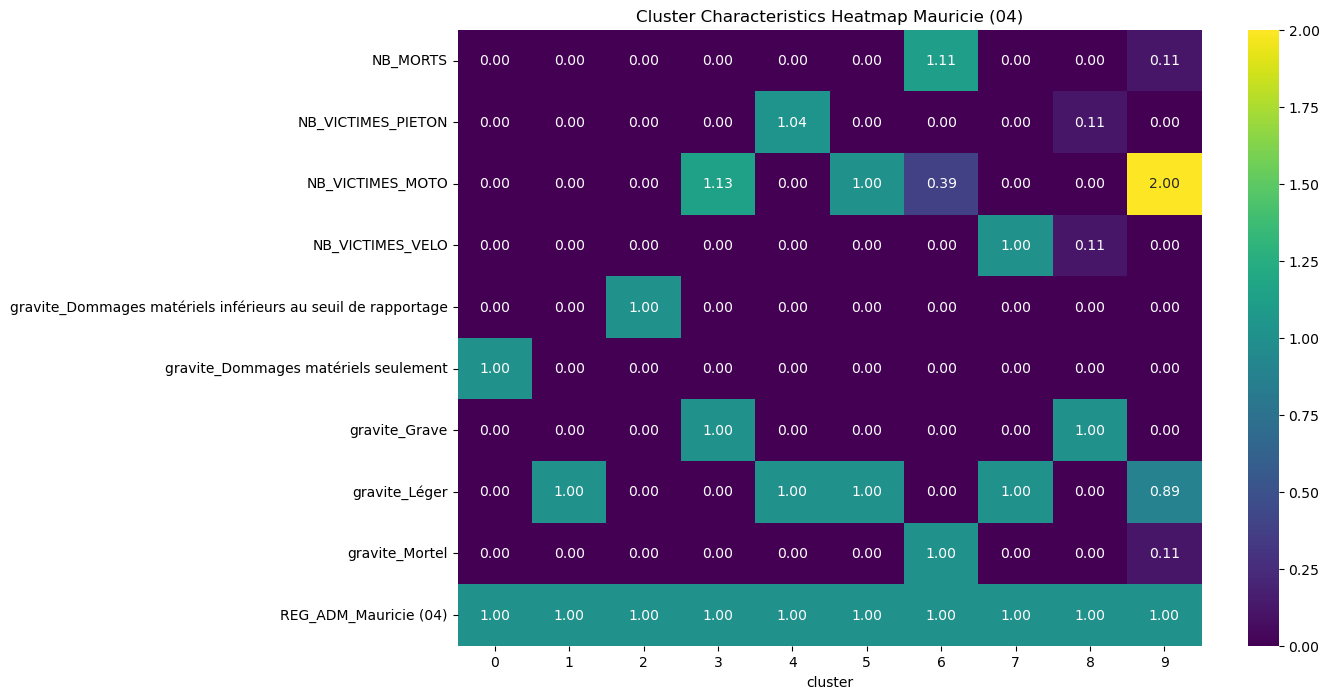

/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


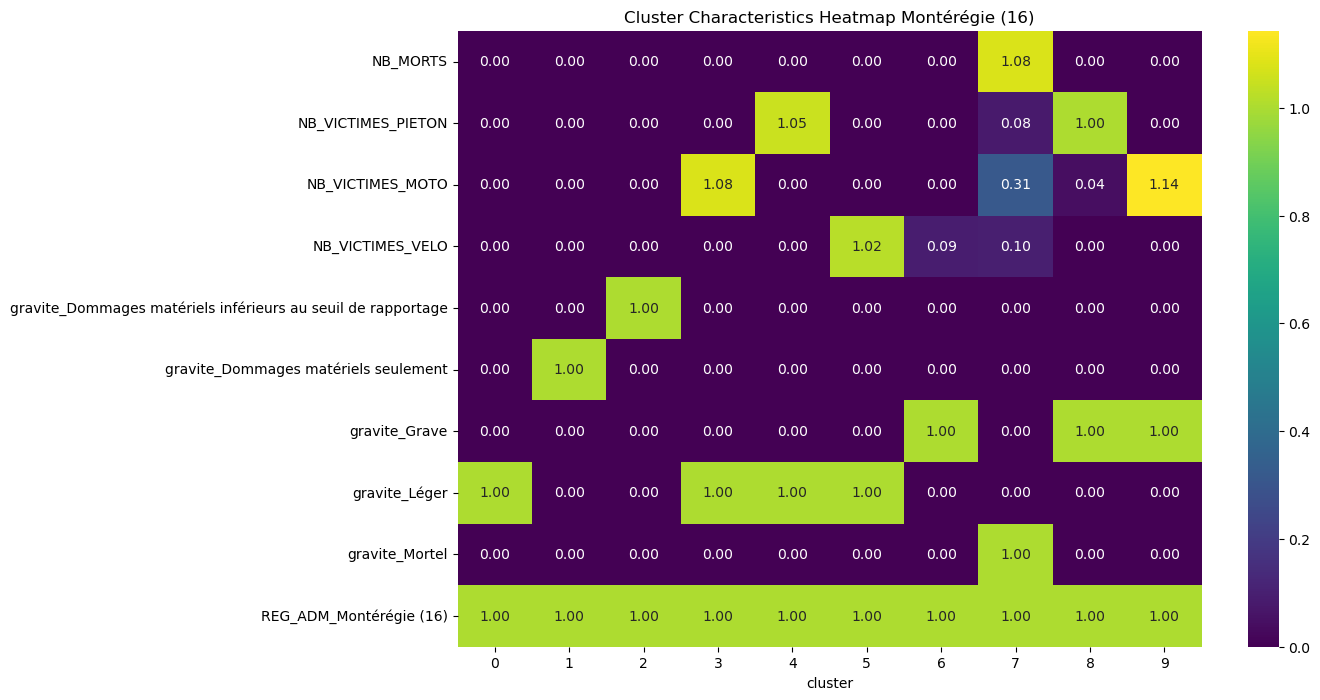

/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


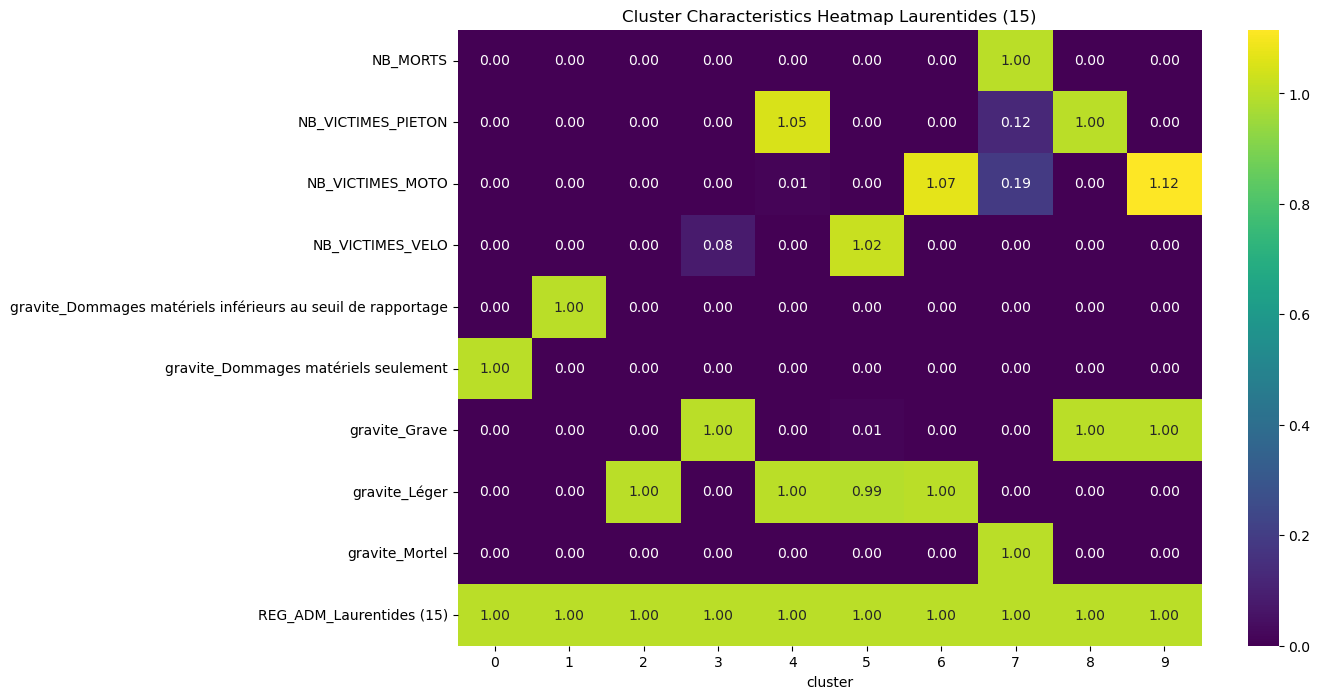

/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


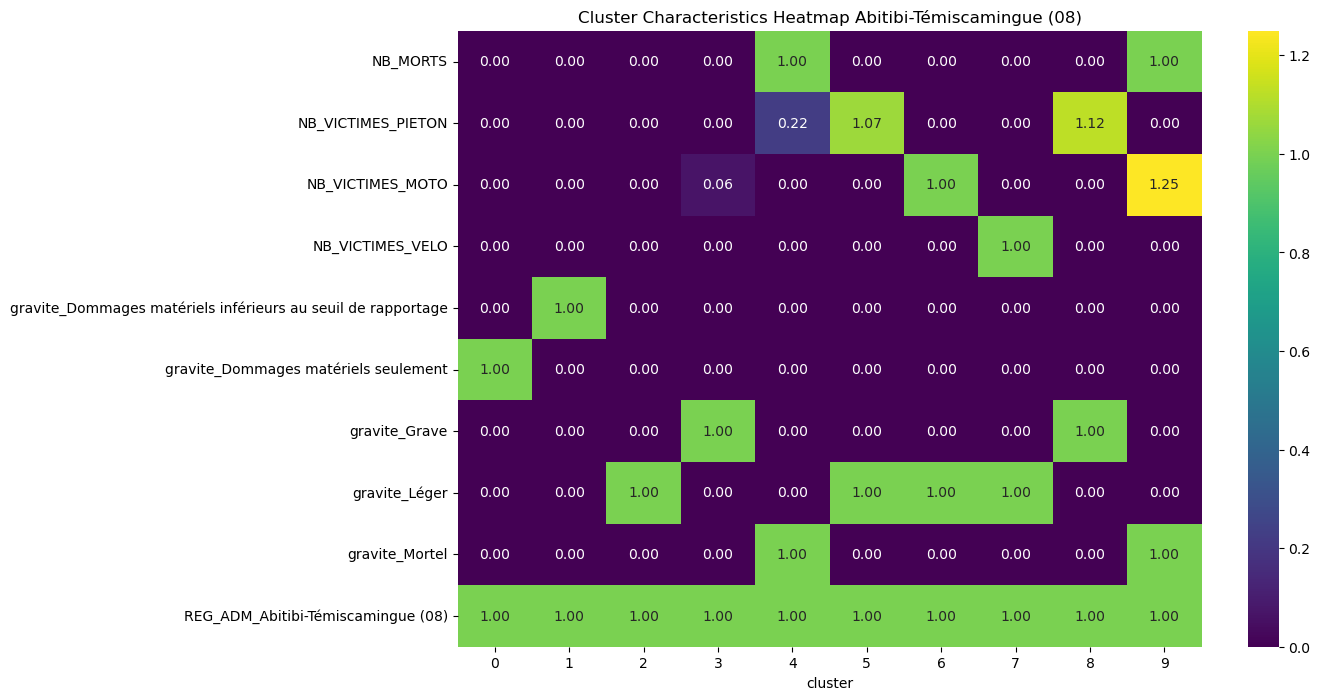

/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


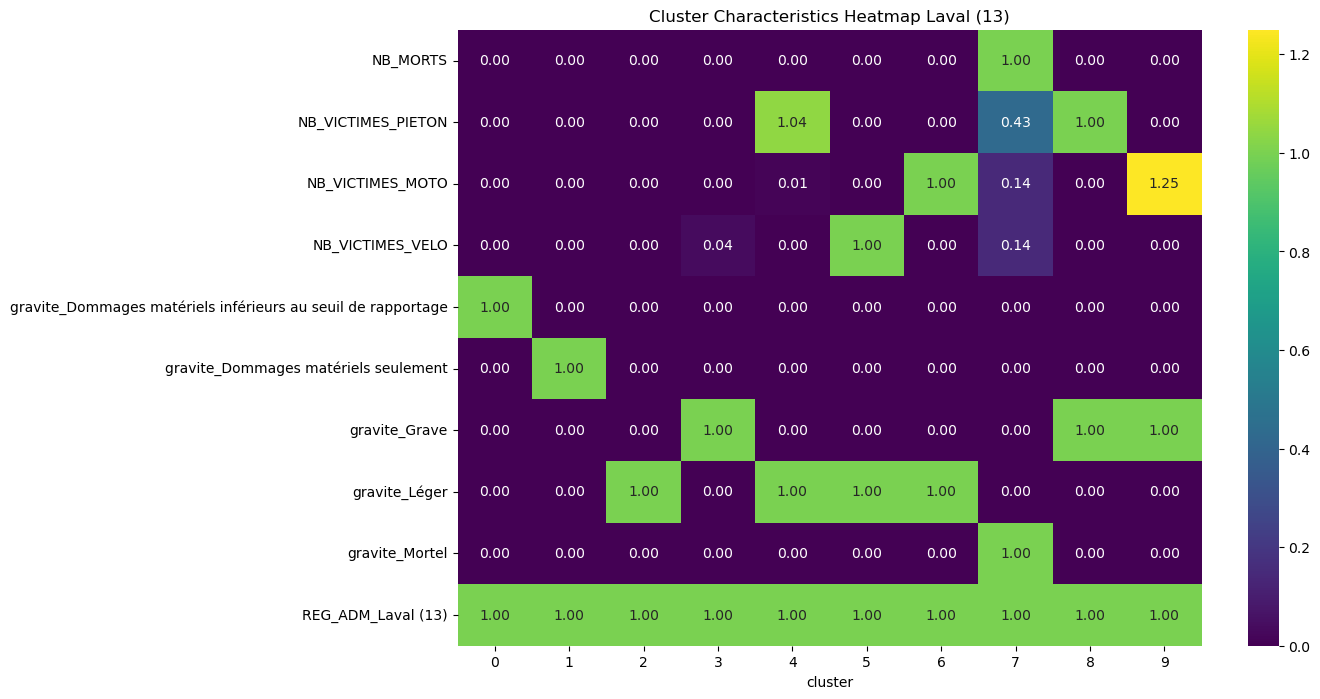

/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


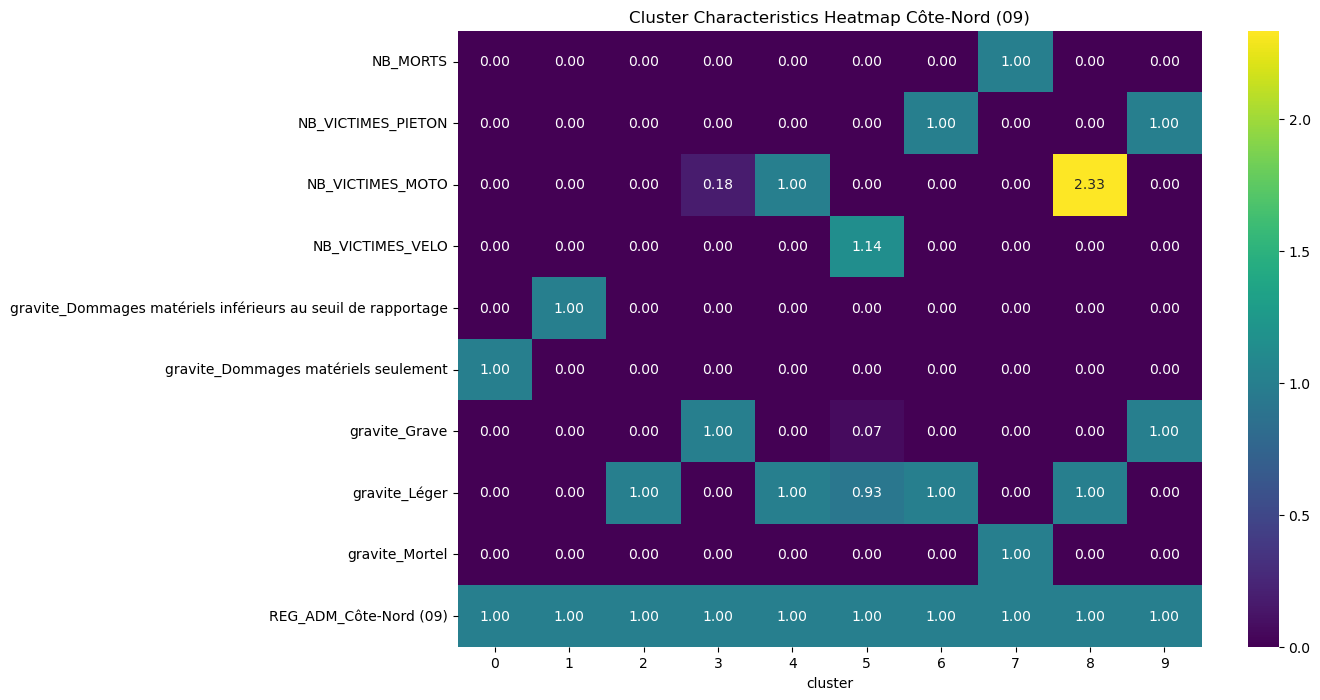

/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


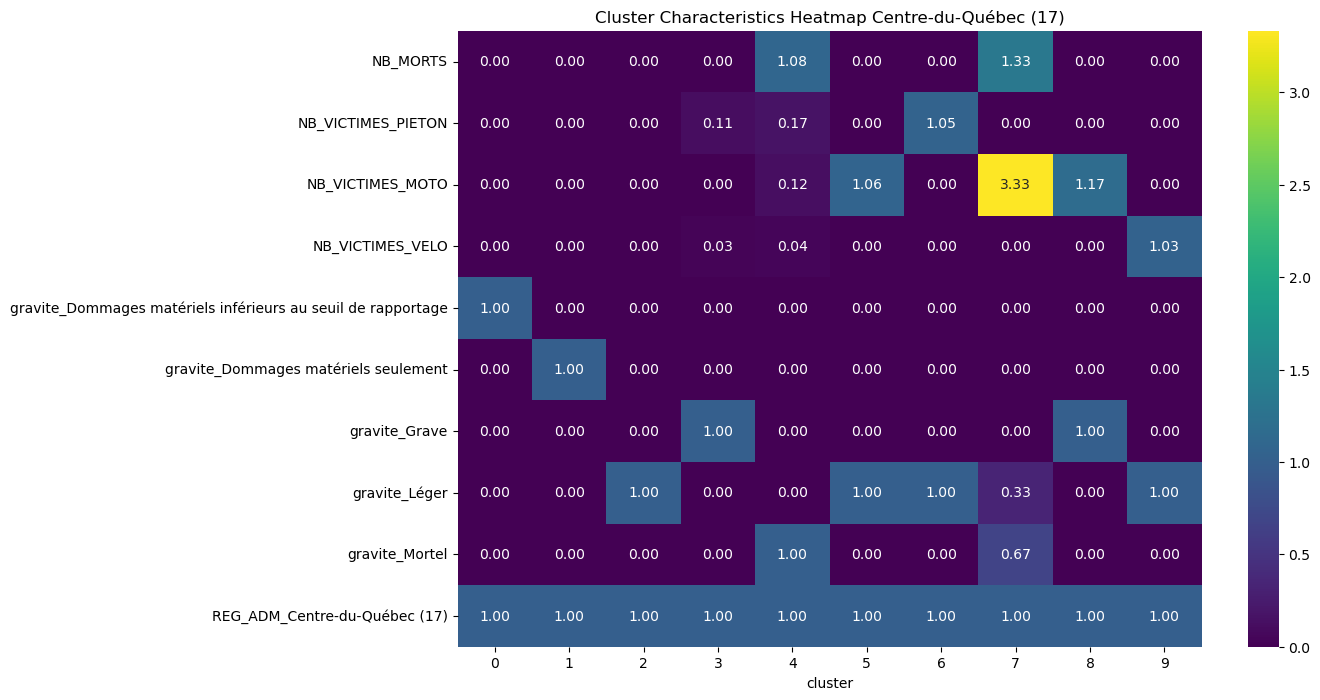

/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


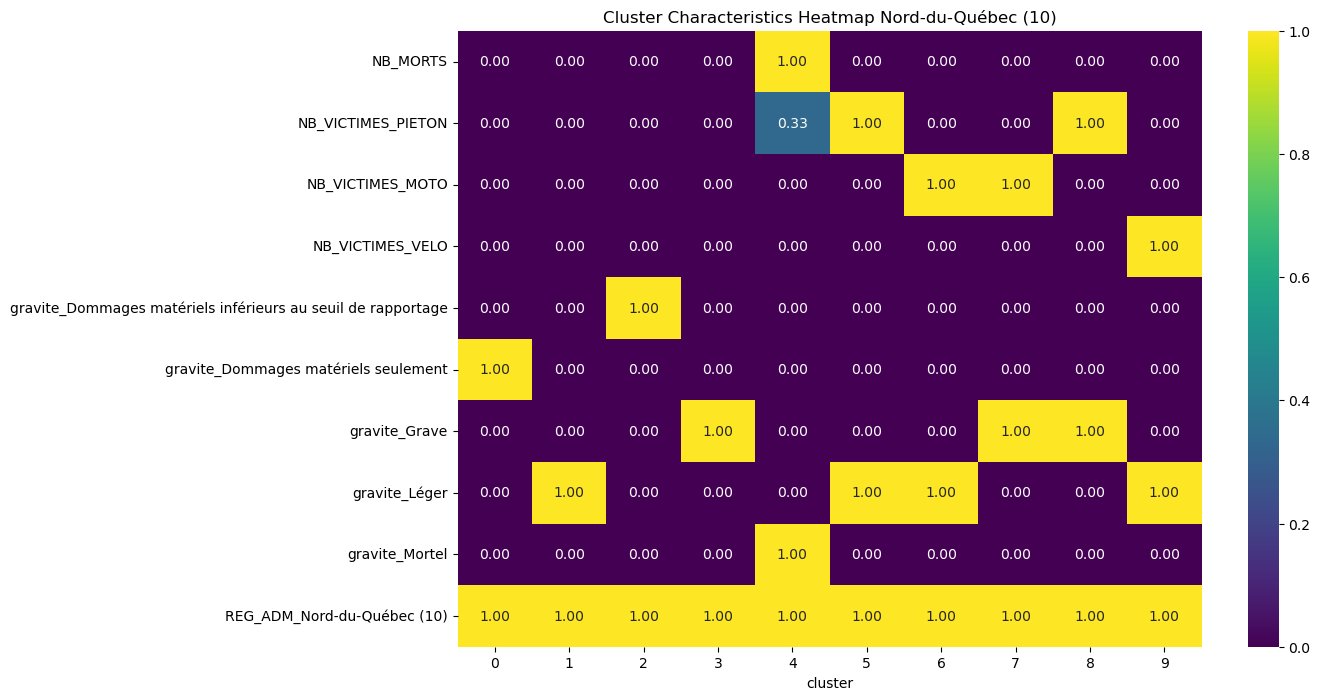

In [61]:
# D'après la methode d'elbow utilisé precedement, k = 10
k=10
features = rapport_clean[['gravite', 'NB_MORTS', 'NB_VICTIMES_PIETON', 'NB_VICTIMES_MOTO', 'NB_VICTIMES_VELO','REG_ADM']]

for i in region:
    features_to_use = features[features['REG_ADM'] == i]
    selected_features = pd.get_dummies(features_to_use, columns=['gravite', 'REG_ADM'])
    kmeans = KMeans(n_clusters=k, random_state=42).fit(selected_features)
    selected_features['cluster'] = kmeans.labels_
    for j in range(k):
        cluster = selected_features[selected_features['cluster'] == j]
    cluster.describe()
    # Heatmap pour visualiser la caractéristique des clusters
    cluster_analysis = selected_features.groupby('cluster').mean()
    plt.figure(figsize=(12, 8))
    sns.heatmap(cluster_analysis.T, cmap='viridis', annot=True, fmt='.2f')
    plt.title(f'Cluster Characteristics Heatmap {i}')
    plt.show()
# Création du cluster en utilisant la méthode k-mean
